# DL Data

In [50]:
import pandas as pd
url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls"
MyData=pd.read_excel(url)
MyData

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-18,18,3,2020,1,0,Afghanistan,AF
1,2020-03-17,17,3,2020,5,0,Afghanistan,AF
2,2020-03-16,16,3,2020,6,0,Afghanistan,AF
3,2020-03-15,15,3,2020,3,0,Afghanistan,AF
4,2020-03-11,11,3,2020,3,0,Afghanistan,AF
...,...,...,...,...,...,...,...,...
5524,2020-01-04,4,1,2020,0,0,Vietnam,VN
5525,2020-01-03,3,1,2020,0,0,Vietnam,VN
5526,2020-01-02,2,1,2020,0,0,Vietnam,VN
5527,2020-01-01,1,1,2020,0,0,Vietnam,VN


In [598]:
from datetime import timedelta, date
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [599]:
import pandas as pd
NData=[]
dates=[]
SumOfNewConfCases=[]
SumofNewDeaths=[]
start_dt = date(2019, 12, 31)
end_dt = date(2020, 3, 18)
k=daterange(start_dt,end_dt)
for i in k:
   # print(i.strftime("%Y-%m-%d"))
    NData=MyData.loc[i]
    S=NData["Cases"].sum()
    D=NData["Deaths"].sum()
    SumOfNewConfCases.append(S)
    SumofNewDeaths.append(D)

In [282]:
import numpy as np
dates=pd.date_range(date(2019,12,30),date(2020,3,17)) # Define time sequence as index
z=np.array([SumOfNewConfCases,SumofNewDeaths]).T
#num_arr=np.random.randn(6,4) # Import numpy random array
columns=['SumOfNewConfCases','SumofNewDeaths'] # Use the table as the column name
df1=pd.DataFrame(z,index=dates,columns=columns)


,SumOfNewConfCases,SumofNewDeaths
2019-12-30,27,0
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,17,0
2020-01-03,0,0
...,...,...
2020-03-13,9375,438
2020-03-14,8140,354
2020-03-15,16051,746
2020-03-16,12745,596


# Plotting

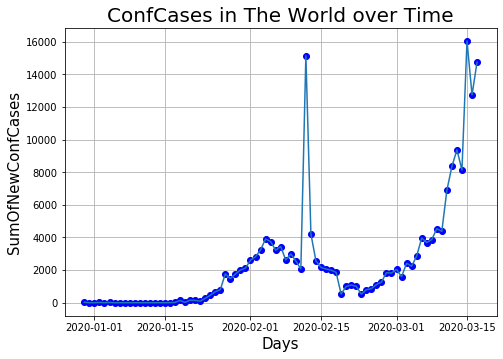

In [91]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumOfNewConfCases",fontsize=15)
plt.title("ConfCases in The World over Time",fontsize=20)
plt.plot(df1["SumOfNewConfCases"],"bo")
plt.plot(df1["SumOfNewConfCases"])
plt.show()

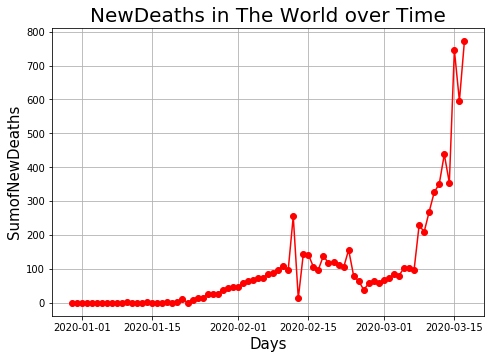

In [97]:
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.plot(df1["SumofNewDeaths"],"ro")
plt.plot(df1["SumofNewDeaths"],color="red")
plt.show()

In [118]:
df1_id=df1.reset_index()
df1_id=df1_id.reset_index()

# Split Data to Train and Test Set

In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df1_id, test_size=0.2, random_state=42)

# 1.Analysis SumOfNewDeaths

### Regression Method

In [676]:
import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()
y = np.c_[train_set["SumofNewDeaths"]]
X = np.c_[train_set["level_0"]]
# Train the model
model.fit(X, y)
#print(model.predict([[73]]))
z=[float(model.predict([i])) for i in X]

# Plotting Regression

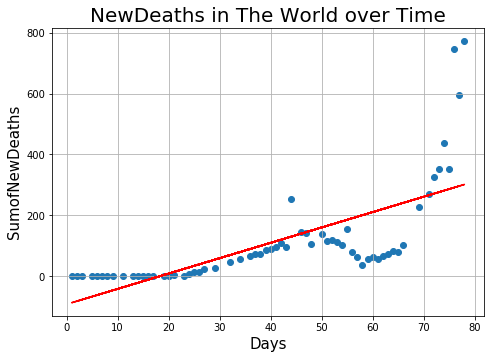

In [677]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumofNewDeaths"])
plt.plot(X, z,color="red")
plt.show()

# MSE 

In [194]:
from sklearn.metrics import mean_squared_error
#housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y, z)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

117.890671362218

#  DecisionTreeRegressor

In [302]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
model = sklearn.tree.DecisionTreeRegressor()
y = np.c_[train_set["SumofNewDeaths"]]
X = np.c_[train_set["level_0"]]
model.fit(X, y)
z=[float(model.predict([i])) for i in X]

# MSE

In [229]:
#housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y, z)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross-Validation

In [232]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, y, z,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [233]:
 def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [ 4.88437743  1.41421356 10.39230485  5.84522597 10.23067284 61.3310688
 11.3210718  36.04626657  1.52752523  5.84522597]
Mean: 14.883795301029172
Standard deviation: 18.118821293232887


# Compare DecisionTree and Linear Regression 

In [234]:
lin_scores = cross_val_score(lin_reg, y, z,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.78142491e-14 2.79095646e-14 1.76068291e-13 1.00663704e-13
 6.51223174e-14 9.60111218e-14 4.69644024e-14 5.59672812e-14
 2.24722597e-14 6.93765330e-14]
Mean: 6.783697241434214e-14
Standard deviation: 4.508449461315944e-14


# RandomForestRegressor

In [660]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
y = np.c_[train_set["SumofNewDeaths"]]
X = np.c_[train_set["level_0"]]
forest_reg.fit(X,y.ravel())
#z=[float(model.predict([i])) for i in X]

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [254]:
forest_scores = cross_val_score(forest_reg, y, z,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 6.57614737  0.77367398 27.25642781  5.97215762 10.71937498 37.47799354
 17.15089891 34.91654336  2.37697286  7.86267554]
Mean: 15.108286598571624
Standard deviation: 12.806699692262713


# Polynomial Regression (deg=2)

In [644]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [645]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([60.89222478]), array([[-6.57198299,  0.14702825]]))

In [646]:
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a0=float(lin_reg.intercept_)
y2=(a1*X1)+(a2*X1**2)+a0

# Plotting Polynomial Regression

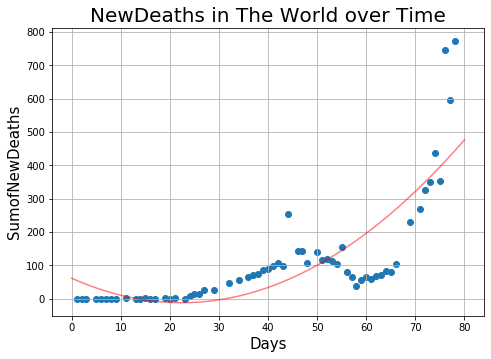

In [647]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumofNewDeaths"])
plt.plot(X1, y2,alpha=0.5,color="red")
plt.show()

# Polynomial Regression (deg=3)

In [648]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [649]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-94.29315391]),
 array([[ 1.66227819e+01, -5.72481093e-01,  5.99240822e-03]]))

In [650]:
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a3=lin_reg.coef_[0][2]
a0=float(lin_reg.intercept_)
y3=(a1*X1)+(a2*X1**2)+(a3*X1**3)+a0

# Plotting Polynomial Regression

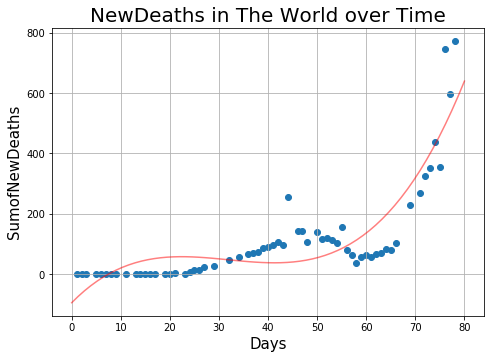

In [651]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumofNewDeaths"])
plt.plot(X1, y3,alpha=0.5,color="red")
plt.show()

# Polynomial Regression (deg=10)

In [662]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [663]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-4.19730133]),
 array([[ 2.32423128e-06, -5.37582313e-05,  4.14128616e-04,
          2.61981436e-03, -3.56013773e-04,  1.91412662e-05,
         -5.18983796e-07,  7.53794785e-09, -5.60946108e-11,
          1.68435192e-13]]))

In [669]:
X1 = np.linspace(0,80,63)
a=[]
y10=float(lin_reg.intercept_)
for i in range(10):
    a.append(lin_reg.coef_[0][i])
    y10=y10+a[i]*(X1**(i+1))

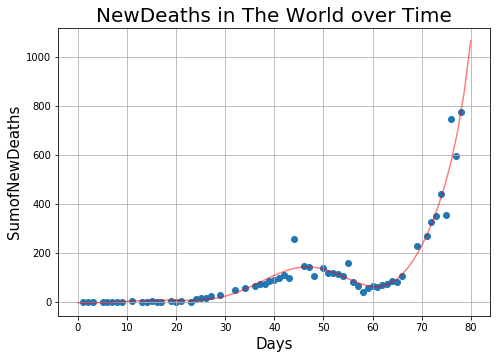

In [670]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
#from numpy.polynomial.polynomial import polyfit
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumofNewDeaths"])
plt.plot(X1, y10,alpha=0.5,color="red")
plt.show()

## Comparing Linear and Polynomial Regression

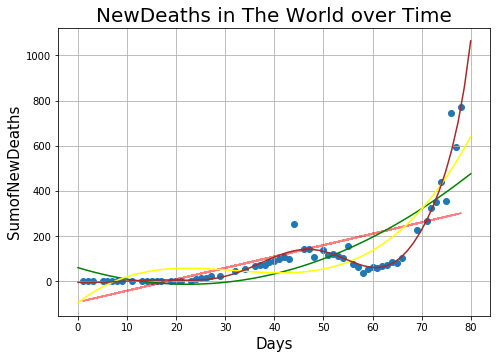

In [687]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumofNewDeaths",fontsize=15)
plt.title("NewDeaths in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumofNewDeaths"])
plt.plot(X, z,alpha=0.5,color="red", label="linear regression")
plt.plot(X1, y2,color="green",label="deg=2")
plt.plot(X1, y3,color="yellow",label="deg=3")
plt.plot(X1, y10,color="brown",label="deg=10")
plt.show()

In [629]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

### Learning Curve(linear Regression)

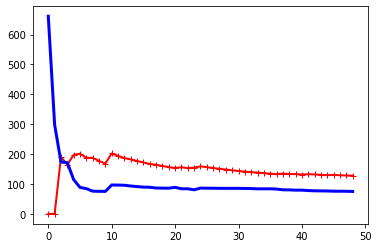

In [633]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Learning Curve(Polynomial Regression deg=2)

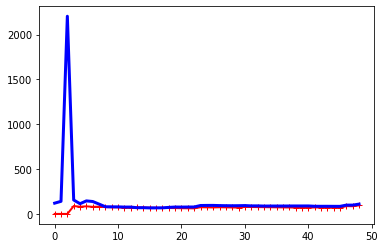

In [636]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

### Learning Curve(Polynomial Regression deg=10)

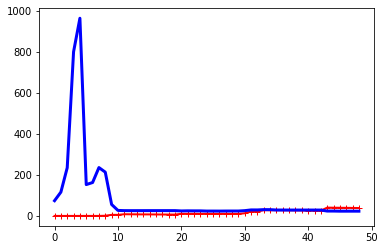

In [637]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

# 2.Analysis SumOfNewConfCases

### linear regression

In [700]:
import sklearn.linear_model
# Select a linear model
model = sklearn.linear_model.LinearRegression()
y = np.c_[train_set["SumOfNewConfCases"]]
X = np.c_[train_set["level_0"]]
# Train the model
model.fit(X, y)
#print(model.predict([[73]]))
z=[float(model.predict([i])) for i in X]

### Polynomial Regression (deg=2)

In [701]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
X1 = np.linspace(0,80,63)
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a0=float(lin_reg.intercept_)
y2=(a1*X1)+(a2*X1**2)+a0

### Polynomial Regression (deg=3)

In [702]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
a1=lin_reg.coef_[0][0]
a2=lin_reg.coef_[0][1]
a3=lin_reg.coef_[0][2]
a0=float(lin_reg.intercept_)
y3=(a1*X1)+(a2*X1**2)+(a3*X1**3)+a0

### Polynomial Regression (deg=10)

In [703]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
a=[]
y10=float(lin_reg.intercept_)
for i in range(10):
    a.append(lin_reg.coef_[0][i])
    y10=y10+a[i]*(X1**(i+1))

# Comparing Linear and Polynomial Regression

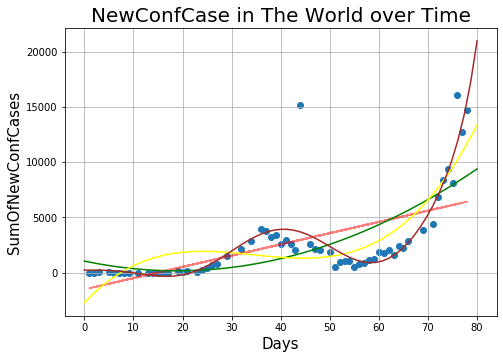

In [705]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure() 
axes1 = fig.add_axes([0.5,0.5,1,1]) 
plt.grid(True,which='both')
plt.xlabel("Days",fontsize=15)
plt.ylabel("SumOfNewConfCases",fontsize=15)
plt.title("NewConfCase in The World over Time",fontsize=20)
plt.scatter(X,train_set["SumOfNewConfCases"])
plt.plot(X, z,alpha=0.5,color="red", label="linear regression")
plt.plot(X1, y2,color="green",label="deg=2")
plt.plot(X1, y3,color="yellow",label="deg=3")
plt.plot(X1, y10,color="brown",label="deg=10")
plt.show()

### Learning Curves

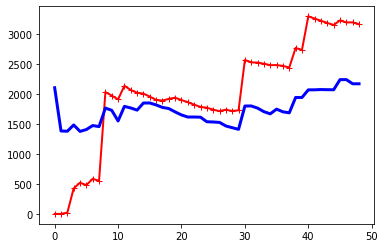

In [707]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

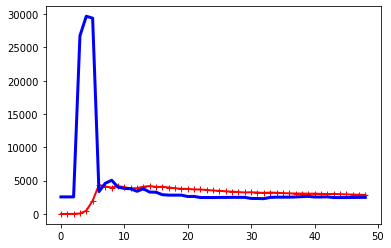

In [709]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

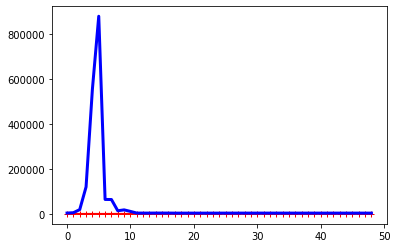

In [711]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)